2018707072 이승룡

# Assignment

Using the same data, you are to try the same problem as above, regression prediction of students' final grades (G3), but with some additional steps: 

1. Apply standard scaling, robust scaling, and min-max scaling to the features and try predicting the final grade (G3). 
2. Apply hyperparameter tuning to the models and explain the differences in performances. 
3. Include "G1" and "G2" features to the features and explain the differences in performances. 
4. Explain and justify whether "G1" and "G2" features should be added or not. 

### Feature information

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

Grades: 

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import scipy

In [5]:
student = pd.read_csv('student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [54]:

student = student.drop(['school', 'G1', 'G2'], axis=1)
category_df = student.select_dtypes(include=['object'])
numeric_df = student.select_dtypes(include=['int64'])

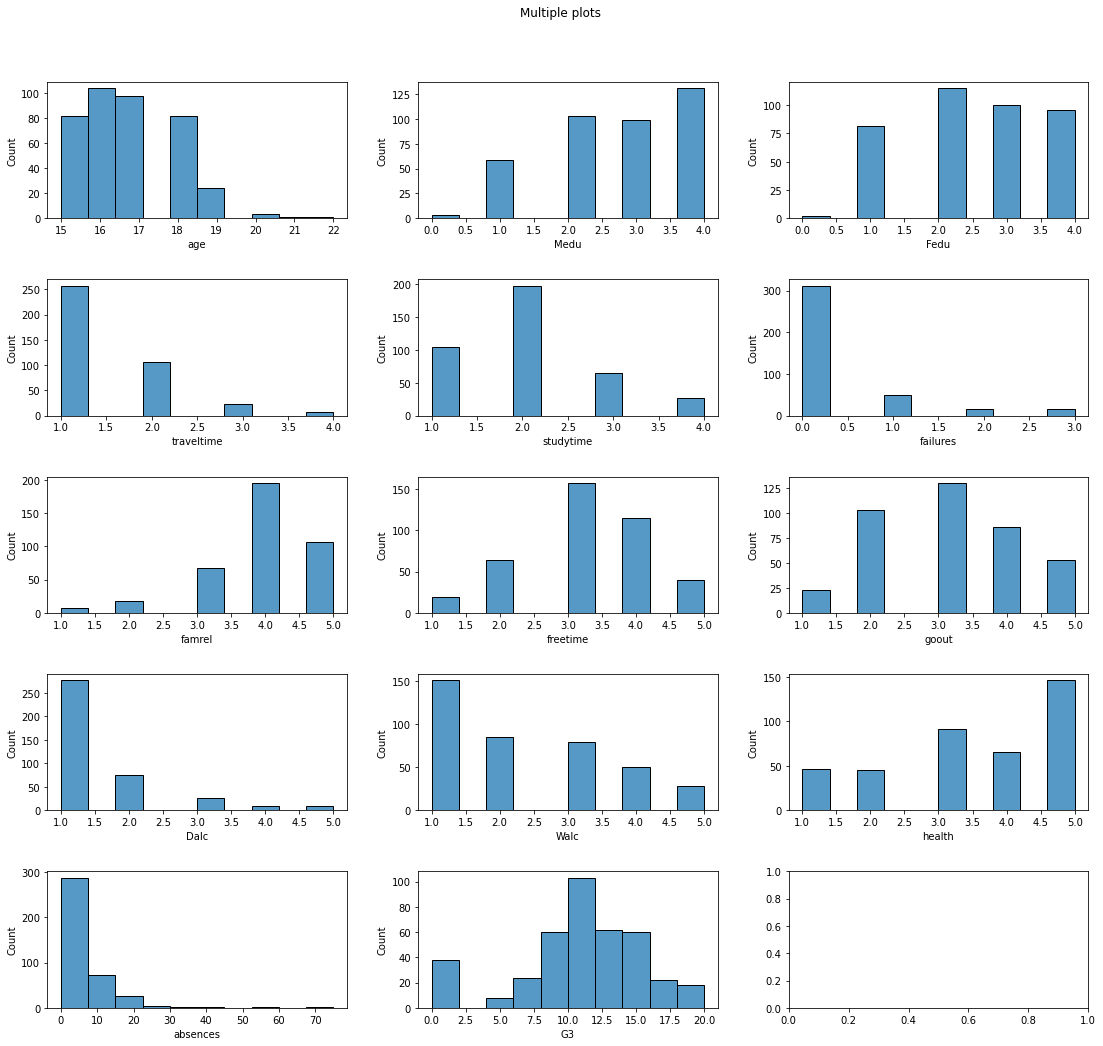

In [55]:
fig, ax = plt.subplots(5, 3, figsize = (16, 15))

fig.suptitle('Multiple plots')
fig.tight_layout(pad=4)
for i, col in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[col], ax = ax[i//3, i%3], bins = 10)

- numeric data들의 분포도를 확인했을 때 absences의 왜곡도가 가장 심한 것을 확인 아래에서 이상치를 제거할 예정(해당 값을 함부로 이상치로 판단하면 안되지만 성능향상의 가능성이 있기 때문에 확인)
    

In [103]:
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
student = pd.read_csv('student-mat.csv')
student.head()
# 함수 사용해서 이상치 값 삭제
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx


outlier_idx = get_outlier(df=student, column='absences', weight=4) #보통 iqr의 1.5배를 기준으로 설정하지만 해당코드에서는 4로 설정
drop_student = student.drop(outlier_idx, axis=0)
drop_student

# drop_numeric_df = drop_student.select_dtypes(include=['int64'])
# drop_numeric_df
# drop_category_df = drop_student.select_dtypes(include=['object'])
# drop_category_df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


- absences의 가장높은 3개의 값을 가진 sample들을 drop하고 새로운 변수에 저장.
- 밑에서 이상치를 제외한 데이터와 지우지 않은 데이터를 가지고 성능비교

In [56]:
student = pd.read_csv('student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [43]:
def preprocessing(df, scaler = None):
    df = df.drop(['school', 'G1', 'G2'], axis=1)
    
    if scaler is not None:
        if scaler == "StandardScaler":
            scaler = StandardScaler()
        elif scaler == "MinMaxScaler":
            scaler = MinMaxScaler()
        else:
            scaler = RobustScaler()

        numeric_df = df.select_dtypes(include=['int64'])
        category_df = df.select_dtypes(include=['object'])
        scal = scaler.fit_transform(numeric_df.iloc[:, :-1])
        df = pd.DataFrame(scal, columns=numeric_df.iloc[:, :-1].columns, index = numeric_df.index)
        df = pd.concat([df, category_df], axis=1)
        df["G3"] = numeric_df.G3       

    df = pd.get_dummies(df)
    X = df.drop(['G3'], axis=1)
    y = df['G3']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
    return X_train, X_test, y_train, y_test


 - school, G1, G2  feature들을  drop하고 인자로 scaler를 주면 numeric data에 대해 scaling을 하고 
 category data에 대해서 원핫 인코딩을 진행 이후 train test split을 이용해서 data 분할

In [44]:
def model_train_test(df, model, scaler = None):
    
    
    X_train, X_test, y_train, y_test = preprocessing(df, scaler)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('Model: ', model)
    print( 'Scaler: ', scaler)
    print('MAE: ', mae.round(3))
    print('RMSE: ', rmse.round(3))
    print('R-squared: ', r2.round(3))
    print()
    

- 데이터를 전처리하고 인자로 준 model에대해서 training이후 test

## Apply standard scaling, robust scaling, and min-max scaling to the features and try predicting the final grade (G3)

In [3]:
from sklearn.utils.validation import check_is_fitted

lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)

models = [lr, mlp, rf, gb, dt, svr, en]

# check_is_fitted(ss) # Raises error


In [97]:
for model in models:
    model_train_test(student, model)

Model:  LinearRegression()
Scaler:  None
MAE:  3.703
RMSE:  4.711
R-squared:  0.195



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  None
MAE:  3.535
RMSE:  4.498
R-squared:  0.267

Model:  RandomForestRegressor()
Scaler:  None
MAE:  3.547
RMSE:  4.587
R-squared:  0.237

Model:  GradientBoostingRegressor()
Scaler:  None
MAE:  3.372
RMSE:  4.515
R-squared:  0.261

Model:  DecisionTreeRegressor()
Scaler:  None
MAE:  3.962
RMSE:  5.418
R-squared:  -0.064

Model:  SVR(gamma='auto')
Scaler:  None
MAE:  3.906
RMSE:  4.997
R-squared:  0.095

Model:  ElasticNet()
Scaler:  None
MAE:  3.998
RMSE:  5.051
R-squared:  0.075



- scaling을 사용하지 않은 경우

In [102]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(student, model, scaler = "StandardScaler")

Model:  LinearRegression()
Scaler:  StandardScaler
MAE:  3.768
RMSE:  4.707
R-squared:  0.197



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  StandardScaler
MAE:  3.662
RMSE:  4.838
R-squared:  0.152

Model:  RandomForestRegressor()
Scaler:  StandardScaler
MAE:  3.503
RMSE:  4.658
R-squared:  0.214

Model:  GradientBoostingRegressor()
Scaler:  StandardScaler
MAE:  3.386
RMSE:  4.526
R-squared:  0.257

Model:  DecisionTreeRegressor()
Scaler:  StandardScaler
MAE:  3.937
RMSE:  5.314
R-squared:  -0.024

Model:  SVR(gamma='auto')
Scaler:  StandardScaler
MAE:  3.881
RMSE:  5.007
R-squared:  0.091

Model:  ElasticNet()
Scaler:  StandardScaler
MAE:  3.925
RMSE:  4.977
R-squared:  0.102



- standard scaling을 사용한 경우

In [101]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(student, model, scaler = "MinMaxScaler")

Model:  LinearRegression()
Scaler:  MinMaxScaler
MAE:  3.71
RMSE:  4.716
R-squared:  0.194



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  MinMaxScaler
MAE:  3.758
RMSE:  4.784
R-squared:  0.171

Model:  RandomForestRegressor()
Scaler:  MinMaxScaler
MAE:  3.449
RMSE:  4.541
R-squared:  0.253

Model:  GradientBoostingRegressor()
Scaler:  MinMaxScaler
MAE:  3.4
RMSE:  4.546
R-squared:  0.251

Model:  DecisionTreeRegressor()
Scaler:  MinMaxScaler
MAE:  3.848
RMSE:  5.251
R-squared:  0.001

Model:  SVR(gamma='auto')
Scaler:  MinMaxScaler
MAE:  3.953
RMSE:  5.144
R-squared:  0.041

Model:  ElasticNet()
Scaler:  MinMaxScaler
MAE:  4.121
RMSE:  5.261
R-squared:  -0.003



- MinMax scaling을 사용한 경우

In [100]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(student, model, scaler = "RobustScaler")

Model:  LinearRegression()
Scaler:  RobustScaler
MAE:  3.702
RMSE:  4.71
R-squared:  0.196



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  RobustScaler
MAE:  3.671
RMSE:  4.773
R-squared:  0.174

Model:  RandomForestRegressor()
Scaler:  RobustScaler
MAE:  3.486
RMSE:  4.58
R-squared:  0.24

Model:  GradientBoostingRegressor()
Scaler:  RobustScaler
MAE:  3.403
RMSE:  4.563
R-squared:  0.245

Model:  DecisionTreeRegressor()
Scaler:  RobustScaler
MAE:  4.114
RMSE:  5.411
R-squared:  -0.061

Model:  SVR(gamma='auto')
Scaler:  RobustScaler
MAE:  3.914
RMSE:  5.043
R-squared:  0.078

Model:  ElasticNet()
Scaler:  RobustScaler
MAE:  3.972
RMSE:  5.069
R-squared:  0.069



- robust scaling을 사용한 경우

In [48]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor(random_state = 0)
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(drop_student, model)

Model:  LinearRegression()
Scaler:  None
MAE:  3.439
RMSE:  4.393
R-squared:  0.029



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  None
MAE:  3.21
RMSE:  4.022
R-squared:  0.186

Model:  RandomForestRegressor(random_state=0)
Scaler:  None
MAE:  2.759
RMSE:  3.653
R-squared:  0.328

Model:  GradientBoostingRegressor()
Scaler:  None
MAE:  3.051
RMSE:  3.976
R-squared:  0.204

Model:  DecisionTreeRegressor()
Scaler:  None
MAE:  3.81
RMSE:  4.992
R-squared:  -0.254

Model:  SVR(gamma='auto')
Scaler:  None
MAE:  3.208
RMSE:  4.265
R-squared:  0.085

Model:  ElasticNet()
Scaler:  None
MAE:  3.139
RMSE:  4.324
R-squared:  0.059



- 이상치를 drop하고 scaling을 적용하지 않은 경우

In [52]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor(random_state = 0)
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(drop_student, model, scaler = "StandardScaler")

Model:  LinearRegression()
Scaler:  StandardScaler
MAE:  3.44
RMSE:  4.394
R-squared:  0.029



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  StandardScaler
MAE:  3.346
RMSE:  4.254
R-squared:  0.089

Model:  RandomForestRegressor(random_state=0)
Scaler:  StandardScaler
MAE:  2.751
RMSE:  3.654
R-squared:  0.328

Model:  GradientBoostingRegressor()
Scaler:  StandardScaler
MAE:  3.065
RMSE:  3.999
R-squared:  0.195

Model:  DecisionTreeRegressor()
Scaler:  StandardScaler
MAE:  4.101
RMSE:  5.664
R-squared:  -0.614

Model:  SVR(gamma='auto')
Scaler:  StandardScaler
MAE:  3.072
RMSE:  4.206
R-squared:  0.11

Model:  ElasticNet()
Scaler:  StandardScaler
MAE:  3.068
RMSE:  4.255
R-squared:  0.089



- 이상치를 drop하고 Standard scaling을 적용한 경우

In [56]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor(random_state = 0)
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(drop_student, model, scaler = "MinMaxScaler")

Model:  LinearRegression()
Scaler:  MinMaxScaler
MAE:  3.437
RMSE:  4.392
R-squared:  0.029



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  MinMaxScaler
MAE:  3.376
RMSE:  4.325
R-squared:  0.059

Model:  RandomForestRegressor(random_state=0)
Scaler:  MinMaxScaler
MAE:  2.751
RMSE:  3.644
R-squared:  0.332

Model:  GradientBoostingRegressor()
Scaler:  MinMaxScaler
MAE:  3.059
RMSE:  3.995
R-squared:  0.197

Model:  DecisionTreeRegressor()
Scaler:  MinMaxScaler
MAE:  3.582
RMSE:  4.686
R-squared:  -0.105

Model:  SVR(gamma='auto')
Scaler:  MinMaxScaler
MAE:  3.274
RMSE:  4.45
R-squared:  0.004

Model:  ElasticNet()
Scaler:  MinMaxScaler
MAE:  3.286
RMSE:  4.508
R-squared:  -0.023



- 이상치를 drop하고 MinMax scaling을 적용한 경우

In [57]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor(random_state = 0)
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(drop_student, model, scaler = "RobustScaler")

Model:  LinearRegression()
Scaler:  RobustScaler
MAE:  3.44
RMSE:  4.394
R-squared:  0.029



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  RobustScaler
MAE:  3.284
RMSE:  4.229
R-squared:  0.1

Model:  RandomForestRegressor(random_state=0)
Scaler:  RobustScaler
MAE:  2.759
RMSE:  3.653
R-squared:  0.328

Model:  GradientBoostingRegressor()
Scaler:  RobustScaler
MAE:  3.078
RMSE:  4.023
R-squared:  0.186

Model:  DecisionTreeRegressor()
Scaler:  RobustScaler
MAE:  3.785
RMSE:  4.959
R-squared:  -0.238

Model:  SVR(gamma='auto')
Scaler:  RobustScaler
MAE:  3.101
RMSE:  4.261
R-squared:  0.087

Model:  ElasticNet()
Scaler:  RobustScaler
MAE:  3.156
RMSE:  4.348
R-squared:  0.049



- 이상치를 drop하고 Robust scaling을 적용한 경우

- absences feature의 이상치(판단) 값을 제거하고 MinMaxScaling을 적용하고 randomforest를 사용했을 때 성능이 제일 높게 나왔음 (
    R-squared:  0.332)

## Apply hyperparameter tuning to the models and explain the differences in performances. 


- 위에서 성능이 제일 좋았던 randomforest에 대해 hyperparameter tuning을 적용

In [2]:
from sklearn.model_selection import GridSearchCV

In [21]:
drop_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [59]:
X_train, X_test, y_train, y_test = preprocessing(drop_student, "MinMaxScaler")
X_train.shape, X_test.shape

((313, 54), (79, 54))

In [60]:
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)

In [61]:
rf_run.fit(X_train, y_train)
p = rf_run.predict(X_test)
r2 = r2_score(y_test, p)
print(r2)

0.3319305011771537


- 파라미터 튜닝 전 성능확인  (
    R-squared:  0.332)

In [70]:
params = {
    'n_estimators':[300, 400, 450, 500],
     'max_depth' : [5, 8, 10, 12, 14],
#     'min_samples_leaf' : [2, 4, 8, 12],
    'min_samples_split' : [4, 6, 8]
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1, scoring ='r2')
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_split': 6, 'n_estimators': 400}
최적 예측 정확도: 0.2917


- max depth와 n_estimaotrs등 여러 파라미터를 gridSearchCV를 통해 바꿔보면서 최적의 하이퍼 파라미터를 구함

In [71]:

rf_run = RandomForestRegressor(random_state=0, n_jobs=-1, max_depth = 12, n_estimators = 400, min_samples_split = 6)
rf_run.fit(X_train, y_train)
p = rf_run.predict(X_test)
r2 = r2_score(y_test, p)
print(r2)

0.35216489111874516


- 위에서 구한 최적의 하이퍼 파라미터로 test,  R-squared 값이  0.352로 증가하였음

## Include "G1" and "G2" features to the features and explain the differences in performances. 


In [72]:
def preprocessing2(df, scaler = None):
    df = df.drop(['school'], axis=1)
    
    if scaler is not None:
        if scaler == "StandardScaler":
            scaler = StandardScaler()
        elif scaler == "MinMaxScaler":
            scaler = MinMaxScaler()
        else:
            scaler = RobustScaler()

        numeric_df = df.select_dtypes(include=['int64'])
        category_df = df.select_dtypes(include=['object'])
        scal = scaler.fit_transform(numeric_df.iloc[:, :-1])
        df = pd.DataFrame(scal, columns=numeric_df.iloc[:, :-1].columns, index = numeric_df.index)
        df = pd.concat([df, category_df], axis=1)
        df["G3"] = numeric_df.G3       

    df = pd.get_dummies(df)
    X = df.drop(['G3'], axis=1)
    y = df['G3']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
    return X_train, X_test, y_train, y_test


In [76]:
def model_train_test(df, model, scaler = None):
    
    
    X_train, X_test, y_train, y_test = preprocessing2(df, scaler)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('Model: ', model)
    print( 'Scaler: ', scaler)
    print('MAE: ', mae.round(3))
    print('RMSE: ', rmse.round(3))
    print('R-squared: ', r2.round(3))
    print()
    

In [85]:
lr = LinearRegression()
mlp = MLPRegressor()
rf = RandomForestRegressor(random_state = 0)
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
models = [lr, mlp, rf, gb, dt, svr, en]
for model in models:   
    model_train_test(drop_student, model)

Model:  LinearRegression()
Scaler:  None
MAE:  1.355
RMSE:  1.975
R-squared:  0.804



C:\Users\s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model:  MLPRegressor()
Scaler:  None
MAE:  1.268
RMSE:  1.763
R-squared:  0.844

Model:  RandomForestRegressor(random_state=0)
Scaler:  None
MAE:  0.812
RMSE:  1.205
R-squared:  0.927

Model:  GradientBoostingRegressor()
Scaler:  None
MAE:  0.933
RMSE:  1.407
R-squared:  0.9

Model:  DecisionTreeRegressor()
Scaler:  None
MAE:  0.823
RMSE:  1.488
R-squared:  0.889

Model:  SVR(gamma='auto')
Scaler:  None
MAE:  1.402
RMSE:  2.153
R-squared:  0.767

Model:  ElasticNet()
Scaler:  None
MAE:  1.067
RMSE:  1.833
R-squared:  0.831



- G1, G2를 포함한 데이터를 이용해 model들을 train시키고 성능비교
- 이전에 가장 높았던 R-squared 값인 0.352가 scaling이나 하이퍼 파라미터 튜닝없이 0.927까지 증가함

In [89]:
# lr = LinearRegression()
# mlp = MLPRegressor()
# rf = RandomForestRegressor(random_state = 0)
# gb = GradientBoostingRegressor()
# dt = DecisionTreeRegressor()
# svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
# en = ElasticNet(alpha=1.0, l1_ratio=0.5)
# models = [lr, mlp, rf, gb, dt, svr, en]
# for model in models:   
#     model_train_test(drop_student, model, scaler = "MinMaxScaler")

In [90]:
# lr = LinearRegression()
# mlp = MLPRegressor()
# rf = RandomForestRegressor(random_state = 0)
# gb = GradientBoostingRegressor()
# dt = DecisionTreeRegressor()
# svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
# en = ElasticNet(alpha=1.0, l1_ratio=0.5)
# models = [lr, mlp, rf, gb, dt, svr, en]
# for model in models:   
#     model_train_test(drop_student, model, scaler = "RobustScaler")

In [6]:

# X_train, X_test, y_train, y_test = preprocessing2(drop_student)
# X_train.shape, X_test.shape


In [7]:
# params = {
#     'n_estimators':[300, 400, 450, 500],
#      'max_depth' : [5, 8, 10, 12, 14],
# #     'min_samples_leaf' : [2, 4, 8, 12],
#     'min_samples_split' : [4, 6, 8]
# }
# rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
# grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1, scoring ='r2')
# grid_cv.fit(X_train, y_train)
 
 
# print('최적 하이퍼 파라미터:', grid_cv.best_params_)
# print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


In [8]:
# rf_run = RandomForestRegressor(random_state=0, n_jobs=-1, max_depth = 12, n_estimators = 300, min_samples_split = 4)
# rf_run.fit(X_train, y_train)
# p = rf_run.predict(X_test)
# r2 = r2_score(y_test, p)
# print(r2)

## Explain and justify whether "G1" and "G2" features should be added or not. 

In [95]:
most_correlated = drop_student.corr().abs()['G3'].sort_values(ascending=False)

# will use the top 8 most correlated features with grade
most_correlated = most_correlated[:9]
most_correlated

G3            1.000000
G2            0.904849
G1            0.801284
failures      0.361689
Medu          0.217714
age           0.160645
Fedu          0.152724
goout         0.135074
traveltime    0.117450
Name: G3, dtype: float64

 **위의 결과에서 볼 수 있듯이 G3와 G2, G1은 높은 상관계수를 가지기 때문에 크게 연관되어 있음을 알 수 있다.** 
 
 **당연하게도 과거에 좋은 성적을 얻은 학생은 미래에도 좋은 성적을 가질 확률이 높을 것이다.**
 
 **그래서 G1, G2 feature를 데이터에 포함하면 성능측면에서는 당연히 좋은 결과를 얻어낼 수 있겠지만, 우리가 얻고자 하는 것은 성적을 가지고 성적을 잘 예측하는 것이 아닌, 그 외의 feature들 중(학교 관련, 가족관련 정보 및 사회적 성향등) 어느 feature가 성적에 영향 및 관련이 있는 지 분석하는 것이다.** 
 
 **그래서 G1, G2 feature들을 제외하고 데이터 분석을 진행해야 유의미한 결과를 얻을 수 있을 것이라고 생각한다.**

